In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(8693, 14)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.shape

(4277, 13)

In [7]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
train['data']='train'

In [9]:
test['data']='test'

In [10]:
all_data = pd.concat([train,test],axis=0)

In [11]:
all_data.shape

(12970, 15)

In [12]:
all_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,test
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,test
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,test
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,test
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN,test


In [13]:
all_data.isnull().sum()/len(all_data)*100
# All are below threshold value 
# So imputation is required

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Name             2.266769
Transported     32.976099
data             0.000000
dtype: float64

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  data          12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.6+ MB


In [15]:
# categorical variables 
for i in list(all_data.select_dtypes(include=('object'))):
    print(i)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Transported
data


In [16]:
# name we can drop
all_data = all_data.drop(columns=['Name'])

In [17]:
all_data.Transported.isnull().sum()

4277

In [18]:
all_data.VIP.isnull().sum()

296

In [19]:
all_data.VIP.value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [20]:
mode_vip = all_data.VIP.mode().values[0]

In [21]:
all_data.VIP.replace(np.nan,mode_vip,inplace=True)

In [22]:
all_data.Destination.value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [23]:
all_data.Destination.isnull().sum()

274

In [24]:
mode_des = all_data.Destination.mode().values[0]

In [25]:
all_data.Destination.replace(np.nan,mode_des,inplace=True)

In [26]:
mode_cryo = all_data.CryoSleep.mode().values[0]

In [27]:
mode_cryo

False

In [28]:
all_data.CryoSleep.value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [29]:
all_data.CryoSleep.replace(np.nan,mode_cryo,inplace = True)

In [30]:
mode_home=all_data.HomePlanet.mode().values[0]

In [31]:
all_data.HomePlanet.isnull().sum()

288

In [32]:
all_data.HomePlanet.replace(np.nan,mode_home,inplace=True)

In [33]:
# Missing values are handled

In [34]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train


In [35]:
all_data.PassengerId.isnull().sum()

0

In [36]:
## for analysis purpose we gonna split passengerid into two. one with groupid,and other is just count_id

In [37]:
new_data = all_data.copy()

In [38]:
new_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train


In [39]:
# Mixed data handling
new_data['group_id'] = new_data['PassengerId'].apply(lambda x:x.split('_')[0])
new_data['count_id'] = new_data['PassengerId'].apply(lambda x:x.split('_')[-1])

In [40]:
new_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train,0004,01


In [41]:
new_data.drop(columns=['PassengerId'],inplace=True)

In [42]:
new_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,train,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,train,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,train,0004,01


In [43]:
new_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
group_id           0
count_id           0
dtype: int64

In [44]:
# Handling Mixed datatype
new_data.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,0001,01


In [45]:
new_data.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'D/296/P', 'D/297/P', 'G/1498/S'],
      dtype=object)

# Cabin contains 3 characters . 1- deck 2.number 3.Side (p-port side s-starboard)

In [46]:
new_data['deck']=new_data['Cabin'].str[0]

In [47]:
new_data.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,deck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,0001,01,B
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,0002,01,F


In [48]:
new_data['number']= new_data['Cabin'].str.extract('(\d+)')
new_data['side']= new_data['Cabin'].str[-1]

In [49]:
new_data.drop('Cabin',axis=1,inplace=True)

In [50]:
new_data.tail(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,deck,number,side
4275,Europa,False,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,test,9273,01,D,297,P
4276,Earth,True,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,test,9277,01,G,1498,S


In [51]:
new_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
group_id           0
count_id           0
deck             299
number           299
side             299
dtype: int64

In [52]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
 11  data          12970 non-null  object 
 12  group_id      12970 non-null  object 
 13  count_id      12970 non-null  object 
 14  deck          12671 non-null  object 
 15  number        12671 non-null  object 
 16  side          12671 non-null  object 
dtypes: bool(2), float64(6), object(9)
memory usage: 1.6+ MB


In [53]:
new_data.tail(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,deck,number,side
4275,Europa,False,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,test,9273,01,D,297,P
4276,Earth,True,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,test,9277,01,G,1498,S


In [54]:
all_data.tail(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,test
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,test


In [55]:
new_data.side.value_counts()

S    6381
P    6290
Name: side, dtype: int64

In [56]:
new_data.side.isnull().sum()

299

In [57]:
new_data.side.replace(np.nan,new_data.side.mode().values[0],inplace=True)

In [58]:
new_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
group_id           0
count_id           0
deck             299
number           299
side               0
dtype: int64

<AxesSubplot: xlabel='Age'>

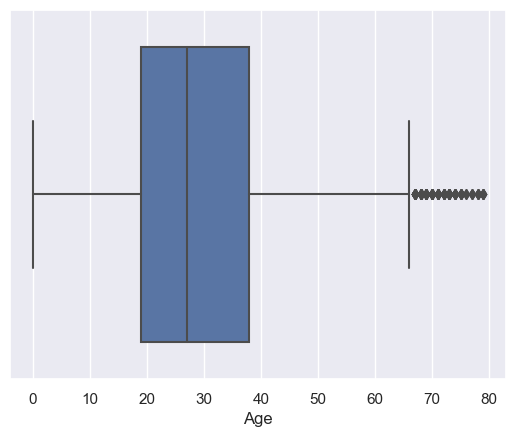

In [59]:
sns.boxplot(x=new_data.Age)

In [60]:
new_data.side.value_counts()

S    6680
P    6290
Name: side, dtype: int64

In [61]:
new_data.deck.value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: deck, dtype: int64

In [62]:
mode_deck = new_data.deck.mode().values[0]

In [63]:
new_data.deck.replace(np.nan,mode_deck,inplace=True)

In [64]:
new_data.deck.isnull().sum()

0

<AxesSubplot: ylabel='Density'>

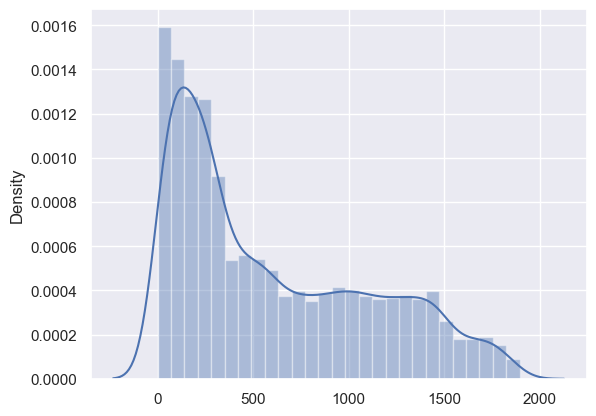

In [65]:
sns.distplot(x=new_data.number)

In [66]:
new_data.number.mode().values[0]

'82'

In [67]:
new_data.number.isnull().sum()

299

In [68]:
## Here the no of missing values are more than mode, if we impute mode then that single value will increase.

In [69]:
mode_num = new_data.number.mode().values[0]


In [70]:
new_data.number.median()


431.0

In [71]:
new_data.number = new_data.number.replace(np.nan,mode_num)

## Check the model accuracy with out number column also

In [72]:
new_data.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,deck,number,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,train,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,train,0002,01,F,0,S


In [73]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
 11  data          12970 non-null  object 
 12  group_id      12970 non-null  object 
 13  count_id      12970 non-null  object 
 14  deck          12970 non-null  object 
 15  number        12970 non-null  object 
 16  side          12970 non-null  object 
dtypes: bool(2), float64(6), object(9)
memory usage: 1.6+ MB


In [74]:
median_age = new_data.Age.median()

In [75]:
median_age

27.0

In [76]:
new_data.Age.replace(np.nan,median_age,inplace=True)

<AxesSubplot: xlabel='RoomService'>

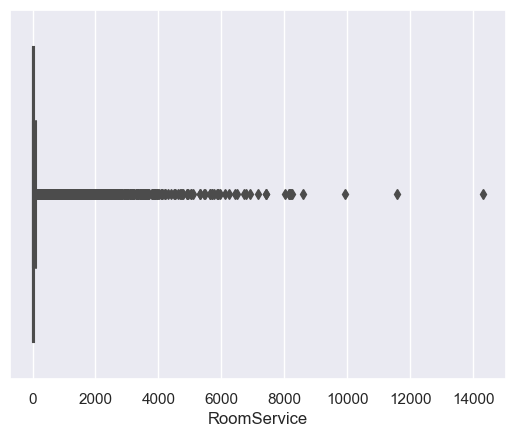

In [77]:
sns.boxplot(x=new_data.RoomService)

<AxesSubplot: xlabel='RoomService', ylabel='Density'>

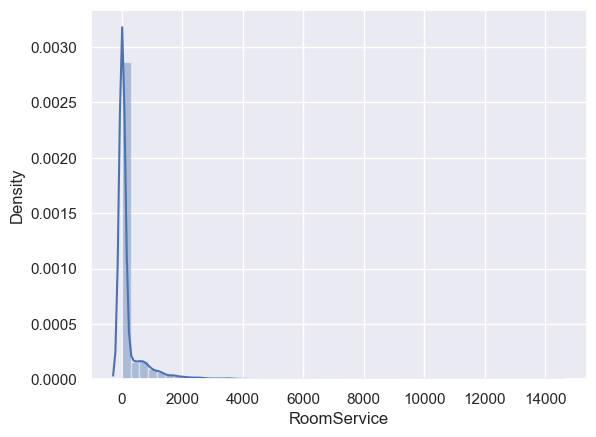

In [78]:
sns.distplot(new_data.RoomService)

In [79]:
new_data.RoomService.describe()

count    12707.000000
mean       222.897852
std        647.596664
min          0.000000
25%          0.000000
50%          0.000000
75%         49.000000
max      14327.000000
Name: RoomService, dtype: float64

In [80]:
median_RoomService = new_data.RoomService.median()

In [81]:
new_data.RoomService.replace(np.nan,median_RoomService,inplace=True)

In [82]:
new_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'data',
       'group_id', 'count_id', 'deck', 'number', 'side'],
      dtype='object')

In [83]:
new_data.ShoppingMall.describe()

count    12664.000000
mean       174.906033
std        590.558690
min          0.000000
25%          0.000000
50%          0.000000
75%         29.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [84]:
new_data.ShoppingMall.replace(np.nan,new_data.ShoppingMall.median(),inplace=True)

In [85]:
new_data.Spa.replace(np.nan,new_data.Spa.median(),inplace=True)

In [86]:
new_data.Spa.describe()

count    12970.000000
mean       301.722282
std       1118.746785
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      22408.000000
Name: Spa, dtype: float64

In [87]:
new_data.VRDeck.replace(np.nan,new_data.VRDeck.median(),inplace=True)

In [88]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   object 
 11  data          12970 non-null  object 
 12  group_id      12970 non-null  object 
 13  count_id      12970 non-null  object 
 14  deck          12970 non-null  object 
 15  number        12970 non-null  object 
 16  side          12970 non-null  object 
dtypes: bool(2), float64(6), object(9)
memory usage: 1.6+ MB


In [89]:
new_data.FoodCourt.describe()

count    12681.000000
mean       451.961675
std       1584.370747
min          0.000000
25%          0.000000
50%          0.000000
75%         77.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [90]:
median_FoodCourt = new_data.FoodCourt.median()

In [91]:
new_data.FoodCourt.replace(np.nan,median_FoodCourt,inplace=True)

# Missing values handled successfully 

# Encoding 

In [92]:
new_data.sample(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,deck,number,side
84,Mars,False,TRAPPIST-1e,22.0,False,197.0,0.0,1175.0,0.0,0.0,NaN,test,0184,01,E,7,P
3364,Earth,False,TRAPPIST-1e,27.0,False,2.0,753.0,5.0,0.0,0.0,True,train,3615,02,F,682,S


In [93]:
new_data.number = pd.to_numeric(new_data.number,errors ='coerce',downcast='integer')

In [94]:
new_data.number.describe()

count    12970.000000
mean       591.577332
std        512.953469
min          0.000000
25%        156.000000
50%        409.000000
75%        992.000000
max       1894.000000
Name: number, dtype: float64

In [95]:
new_data.group_id = pd.to_numeric(new_data.group_id,errors = 'coerce',downcast='integer')

In [96]:
new_data.count_id = pd.to_numeric(new_data.count_id,errors = 'coerce',downcast='integer')

In [97]:
new_data.count_id.describe()

count    12970.000000
mean         1.511488
std          1.042500
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: count_id, dtype: float64

In [98]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   object 
 11  data          12970 non-null  object 
 12  group_id      12970 non-null  int16  
 13  count_id      12970 non-null  int8   
 14  deck          12970 non-null  object 
 15  number        12970 non-null  int16  
 16  side          12970 non-null  object 
dtypes: bool(2), float64(6), int16(2), int8(1), object(6)
memory usage: 1.4

In [99]:
for i in list(new_data.select_dtypes(include=(['object','bool']))):
    print(i)

HomePlanet
CryoSleep
Destination
VIP
Transported
data
deck
side


In [100]:
new_data.deck.describe()

count     12970
unique        8
top           F
freq       4538
Name: deck, dtype: object

In [101]:
encode_data = pd.get_dummies(new_data,columns=['HomePlanet','CryoSleep','Destination','VIP','deck','side'],drop_first=True)

In [102]:
encode_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,train,1,1,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,train,2,1,...,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,train,3,1,...,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,train,3,2,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,train,4,1,...,1,0,0,0,0,0,1,0,0,1


In [103]:
encode_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'data', 'group_id', 'count_id', 'number',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_S'],
      dtype='object')

## Outlier detection and handling 

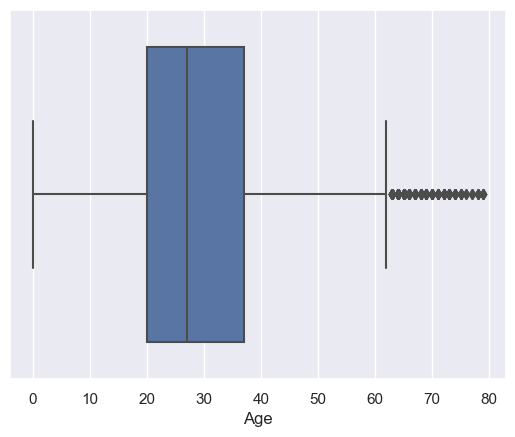

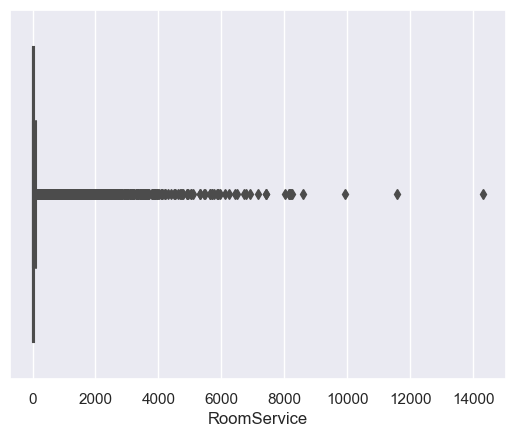

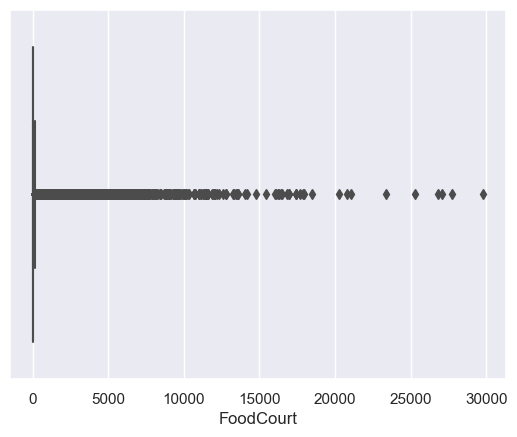

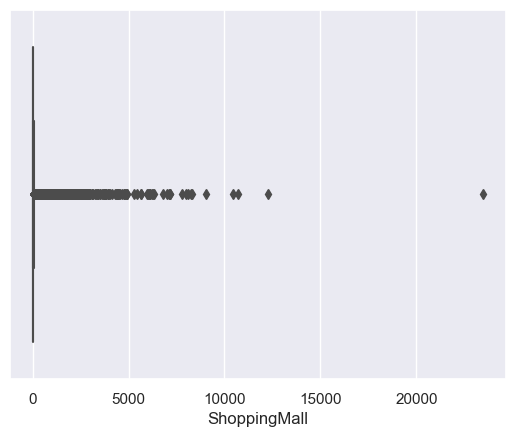

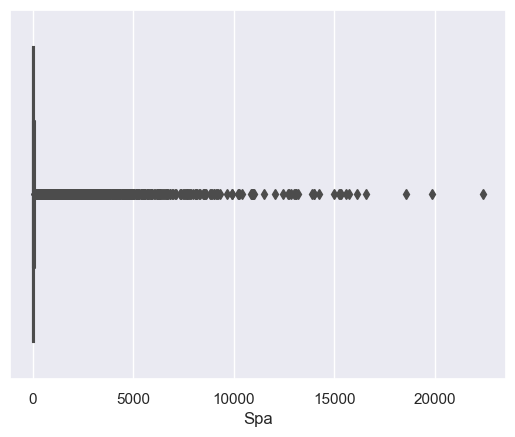

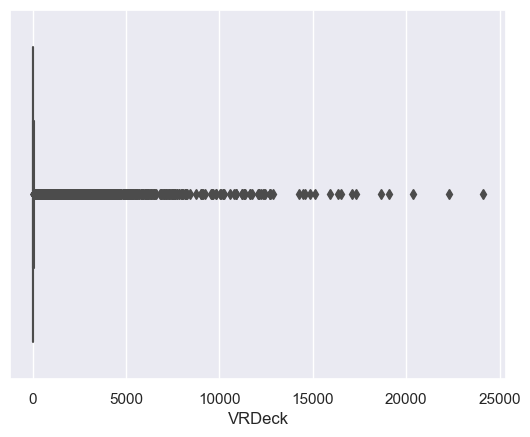

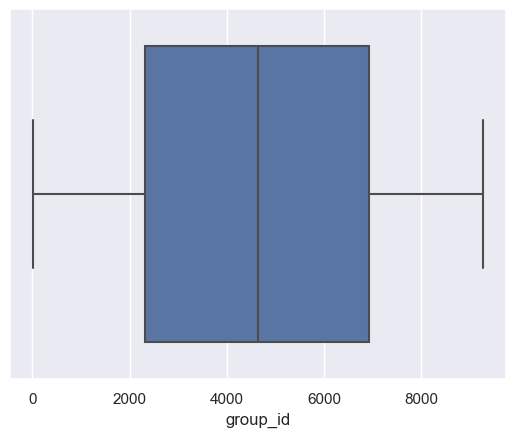

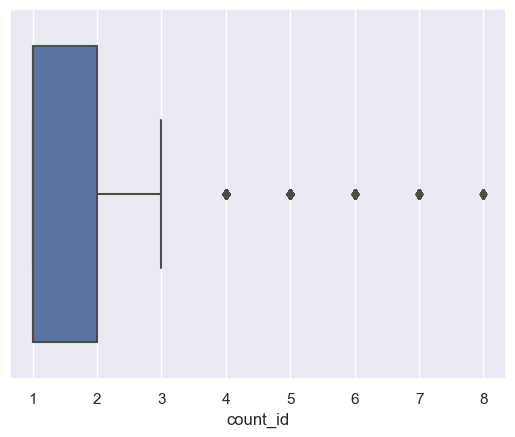

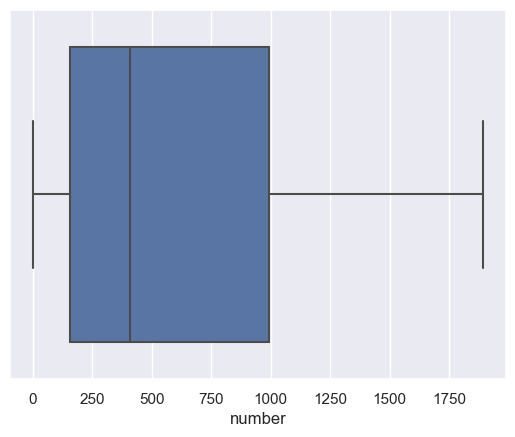

In [104]:
def boxplot(col):
    sns.boxplot(x=new_data[col])
    plt.show()
    
for i in list(new_data.select_dtypes(exclude=(['object','bool']))):
    boxplot(i)

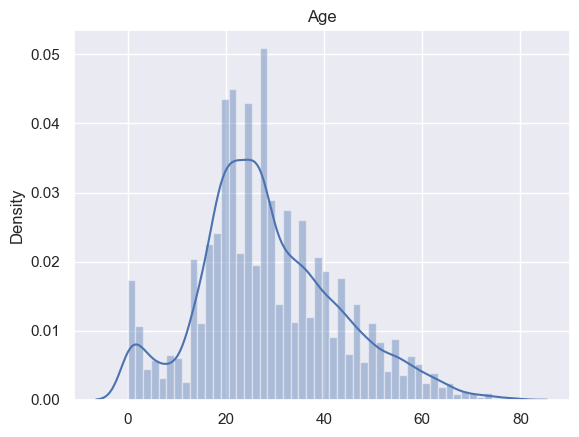

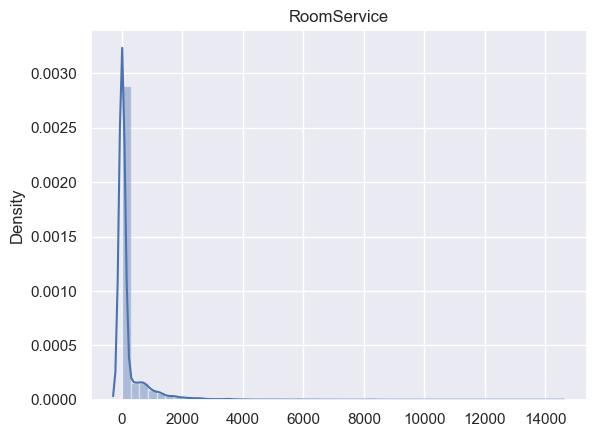

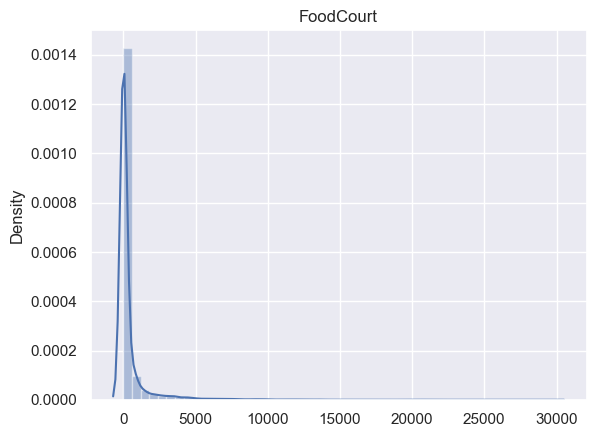

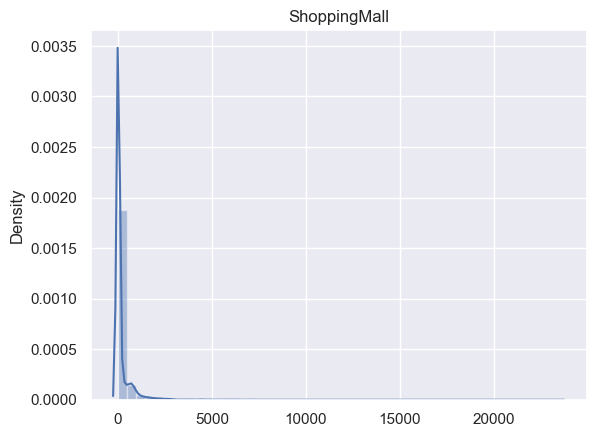

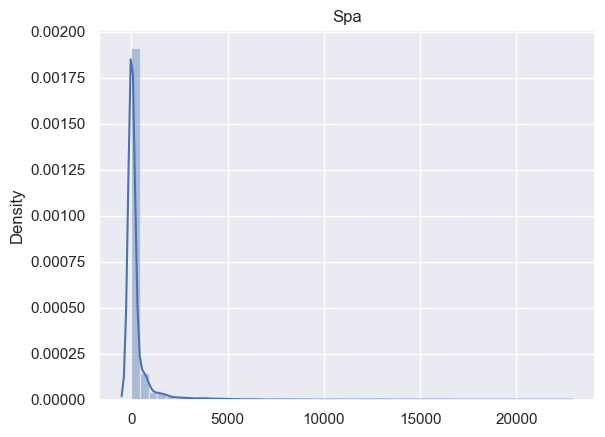

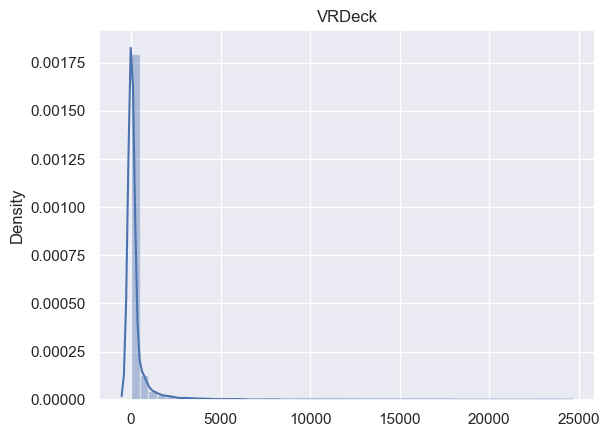

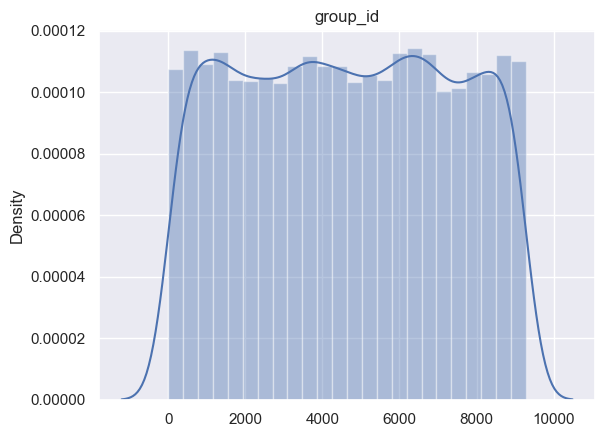

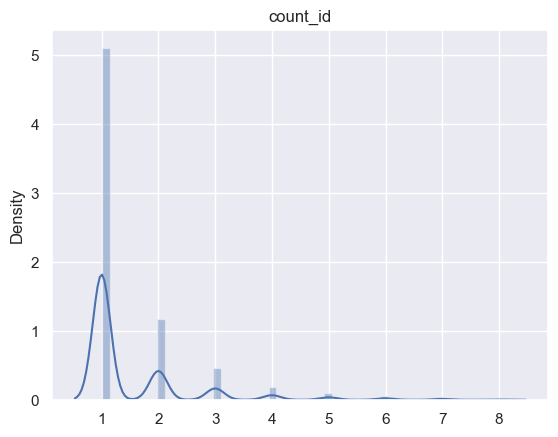

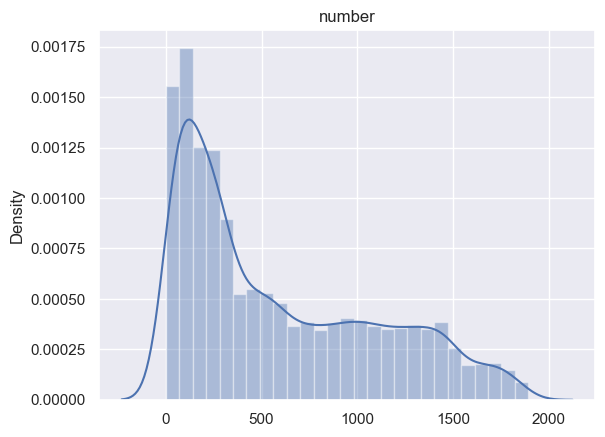

In [105]:
def distplot(col):
    sns.distplot(x=new_data[col])
    plt.title(col)
    plt.show()
    
for i in list(new_data.select_dtypes(exclude=(['object','bool']))):
    distplot(i)

In [106]:
## no outlier handling ecause no abnormal values found

In [107]:
encode_data.tail()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,group_id,count_id,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
4272,34.0,0.0,0.0,0.0,0.0,0.0,NaN,test,9266,2,...,1,0,0,0,0,0,0,1,0,1
4273,42.0,0.0,847.0,17.0,10.0,144.0,NaN,test,9269,1,...,1,0,0,0,0,0,1,0,0,1
4274,27.0,0.0,0.0,0.0,0.0,0.0,NaN,test,9271,1,...,0,0,0,0,1,0,0,0,0,0
4275,27.0,0.0,2680.0,0.0,0.0,523.0,NaN,test,9273,1,...,1,0,0,0,1,0,0,0,0,0
4276,43.0,0.0,0.0,0.0,0.0,0.0,NaN,test,9277,1,...,0,0,0,0,0,0,0,1,0,1


In [108]:
## Split data into test and train
train_data = encode_data[encode_data['data']=='train']
test_data = encode_data[encode_data['data']=='test']

In [109]:
train_data.shape , test_data.shape

((8693, 25), (4277, 25))

In [110]:
train_data.drop(columns=['data'],inplace=True)

In [111]:
test_data.drop(columns=['data'],inplace=True)

In [112]:
train_data.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,count_id,number,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,0,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,2,1,0,...,1,0,0,0,0,0,1,0,0,1


In [113]:
x = train_data.drop(columns=['Transported'])
y=train_data['Transported']

In [114]:
x.shape ,y.shape

((8693, 23), (8693,))

In [115]:
y.head(3)

0    False
1     True
2    False
Name: Transported, dtype: object

In [116]:
 y_dum = pd.get_dummies(y,drop_first=True)

In [117]:
y_dum.head()

,True
0,0
1,1
2,0
3,0
4,1


In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_dum,test_size=0.2)

In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [181]:
len(x_train),len(x_test),len(y_train),len(y_test)

(6954, 1739, 6954, 1739)

In [182]:
model.fit(x_train,y_train)

LogisticRegression()

In [183]:
model.score(x_test,y_test)

0.7889591719378953

In [184]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [186]:
confusion_matrix(y_test,y_pred_test)

array([[603, 259],
       [108, 769]], dtype=int64)

In [187]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       862
           1       0.75      0.88      0.81       877

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



In [188]:
accuracy_score(y_train,y_pred_train)

0.7794075352315214

In [189]:
accuracy_score(y_test,y_pred_test)

0.7889591719378953

In [190]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.7881944352583554

In [191]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,count_id,number,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,NaN,13,1,3,...,1,0,0,0,0,0,0,1,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,NaN,18,1,4,...,1,0,0,0,0,0,1,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,NaN,19,1,0,...,0,0,0,1,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,NaN,21,1,1,...,1,0,0,1,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,NaN,23,1,5,...,1,0,0,0,0,0,1,0,0,1


In [192]:
len(x_test)

1739

In [193]:
test_x = test_data.drop(columns=['Transported'])

In [194]:
test_predict = model.predict(test_x)

In [195]:
test_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [196]:
test_x.sample(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group_id,count_id,number,HomePlanet_Europa,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
2938,17.0,0.0,0.0,0.0,0.0,0.0,6479,1,78,1,...,0,0,0,0,0,0,0,0,0,1
2109,10.0,0.0,0.0,0.0,0.0,0.0,4582,2,748,0,...,1,0,0,0,0,0,0,1,0,1
2774,35.0,0.0,0.0,1090.0,0.0,0.0,6134,1,1171,0,...,1,0,0,0,0,0,1,0,0,1
2148,7.0,0.0,0.0,0.0,0.0,0.0,4671,1,949,0,...,1,0,0,0,0,0,1,0,0,0
733,60.0,0.0,0.0,0.0,0.0,0.0,1495,2,241,0,...,0,0,0,0,0,0,0,1,0,0


In [197]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':test_predict})

In [198]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   uint8 
dtypes: object(1), uint8(1)
memory usage: 37.7+ KB


In [199]:
submission.Transported = np.where(submission.Transported == 1,'True','False')

In [200]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [139]:
# submission.to_csv('Spaceship_titanic_logistic_regression.csv',index=False)

In [201]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [202]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='gini')

In [203]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [204]:
len(x_train),len(y_train)

(6954, 6954)

In [205]:
len(x_test),len(y_test)

(1739, 1739)

In [206]:
y_pred_rf = rf.predict(x_test)

In [207]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [208]:
rf.score(x_test,y_test)

0.8021851638872916

In [209]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       862
           1       0.83      0.76      0.80       877

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [210]:
confusion_matrix(y_test,y_pred_rf)

array([[726, 136],
       [208, 669]], dtype=int64)

In [211]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,count_id,number,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,NaN,13,1,3,...,1,0,0,0,0,0,0,1,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,NaN,18,1,4,...,1,0,0,0,0,0,1,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,NaN,19,1,0,...,0,0,0,1,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,NaN,21,1,1,...,1,0,0,1,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,NaN,23,1,5,...,1,0,0,0,0,0,1,0,0,1


In [212]:
test_data.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'group_id', 'count_id', 'number', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_True', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'deck_T', 'side_S'],
      dtype='object')

In [213]:
x_test_rf = test_data.drop(columns=['Transported'])

In [214]:
y_test_rf = rf.predict(x_test_rf)

In [215]:
y_test_rf

array([1, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [216]:
test_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [217]:
confusion_matrix(test_predict,y_test_rf)

array([[1657,   26],
       [ 606, 1988]], dtype=int64)

In [218]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':y_test_rf})

In [219]:
submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [220]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   uint8 
dtypes: object(1), uint8(1)
memory usage: 37.7+ KB


In [221]:
submission['Transported'] = np.where(submission.Transported == 1,'True','False')

In [222]:
submission.sample(5)

,PassengerId,Transported
3997,8707_01,False
1246,2639_01,True
344,0739_01,True
2640,5789_02,True
1855,3947_01,False


In [ ]:
# submission.to_csv('Titanic_Random_Forest.csv',index=False)

In [223]:
train_data.sample(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,count_id,number,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
8352,25.0,0.0,0.0,0.0,0.0,0.0,True,8937,1,574,...,1,0,0,0,0,1,0,0,0,0
3225,31.0,0.0,0.0,0.0,0.0,0.0,True,3474,1,110,...,1,0,1,0,0,0,0,0,0,0
460,21.0,513.0,0.0,1749.0,82.0,0.0,True,500,1,19,...,0,0,0,0,1,0,0,0,0,0


In [224]:
features = train_data.drop('Transported',axis=1)
target = train['Transported']

In [226]:
features.shape

(8693, 23)

In [227]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2)

In [228]:
len(x_train),len(x_test),len(y_train),len(y_test)

(6954, 1739, 6954, 1739)

In [322]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [230]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [231]:
ada.score(x_test,y_test)

0.8039102932719954

In [232]:
ada.score(x_train,y_train)

0.7985332182916307

In [233]:
y_pred_ada_train = ada.predict(x_train)
y_pred_ada_test = ada.predict(x_test)

In [234]:
print(classification_report(y_test,y_pred_ada_test))

              precision    recall  f1-score   support

       False       0.80      0.79      0.80       848
        True       0.81      0.81      0.81       891

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [235]:
print(classification_report(y_train,y_pred_ada_train))

              precision    recall  f1-score   support

       False       0.81      0.78      0.79      3467
        True       0.79      0.82      0.80      3487

    accuracy                           0.80      6954
   macro avg       0.80      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954



In [236]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier()

In [237]:
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [238]:
gd.score(x_test,y_test)

0.8171362852213916

In [239]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [240]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [241]:
xg.score(x_test,y_test)

0.8159861989649224

In [243]:
from sklearn.model_selection import cross_val_score

In [249]:
cv_gd = cross_val_score(gd,features,target,cv=10)

In [250]:
cv_gd

array([0.79310345, 0.76091954, 0.71494253, 0.69044879, 0.77445339,
       0.82163406, 0.81933257, 0.8296893 , 0.81357883, 0.70771001])

In [251]:
cv_gd.mean()

0.7725812467759217

In [252]:
cv_xg = cross_val_score(xg,features,target,cv=10)

In [253]:
cv_xg.mean()

0.6862941946748145

In [254]:
test_data.sample(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,count_id,number,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
1796,24.0,0.0,734.0,0.0,2.0,2.0,NaN,3829,2,721,...,1,0,0,0,0,0,1,0,0,1
274,53.0,0.0,0.0,0.0,0.0,0.0,NaN,613,1,26,...,1,0,1,0,0,0,0,0,0,0
1518,6.0,0.0,0.0,0.0,0.0,0.0,NaN,3265,2,119,...,0,0,1,0,0,0,0,0,0,1
3504,2.0,0.0,0.0,0.0,0.0,0.0,NaN,7610,1,1233,...,0,0,0,0,0,0,0,1,0,1
3046,24.0,153.0,0.0,1153.0,0.0,3185.0,NaN,6685,1,441,...,0,0,0,0,0,1,0,0,0,1


In [371]:
test_data1=test_data.drop(columns=['Transported'])

In [372]:
test_data1.tail()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group_id,count_id,number,HomePlanet_Europa,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
4272,34.0,0.0,0.0,0.0,0.0,0.0,9266,2,1496,0,...,1,0,0,0,0,0,0,1,0,1
4273,42.0,0.0,847.0,17.0,10.0,144.0,9269,1,82,0,...,1,0,0,0,0,0,1,0,0,1
4274,27.0,0.0,0.0,0.0,0.0,0.0,9271,1,296,0,...,0,0,0,0,1,0,0,0,0,0
4275,27.0,0.0,2680.0,0.0,0.0,523.0,9273,1,297,1,...,1,0,0,0,1,0,0,0,0,0
4276,43.0,0.0,0.0,0.0,0.0,0.0,9277,1,1498,0,...,0,0,0,0,0,0,0,1,0,1


In [274]:
gd_answer = gd.predict(test_data1)

In [275]:
gd_answer

array([ True, False,  True, ...,  True,  True,  True])

In [276]:
answer = pd.DataFrame({'PassengerId':test.PassengerId,
                          'Transported':gd_answer})

In [277]:
answer.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [278]:
answer.to_csv('gradientDescentClassifier.csv',index=False)

## new attempt with out group id and countid

In [324]:
train_data1.tail()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,number,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,98,1,0,...,0,1,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1499,0,0,...,0,0,0,0,0,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1500,0,0,...,1,0,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,608,1,0,...,0,0,0,0,0,1,0,0,0,1
8692,44.0,126.0,4688.0,0.0,0.0,12.0,True,608,1,0,...,1,0,0,0,0,1,0,0,0,1


In [335]:
train_data1 = train_data.drop(columns=['group_id','count_id'])

In [336]:
train_x_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,number,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [374]:
test_data1 = test_data.drop(columns=['group_id','count_id'])

In [377]:
test_data1.drop(columns=['Transported'],inplace=True)

In [338]:
train_x_data =train_data1.drop(columns=['Transported'])
train_y_data =train_data1['Transported']

In [340]:
train_y_data.unique()

array([False, True], dtype=object)

In [345]:
train_y_data[train_y_data==True]

1       True
4       True
5       True
6       True
7       True
        ... 
8684    True
8685    True
8687    True
8690    True
8692    True
Name: Transported, Length: 4378, dtype: object

In [346]:
train_y_data = np.where(train_y_data ==True,1,0)

In [347]:
train_x_data.shape,train_y_data.shape

((8693, 21), (8693,))

In [348]:
x_train,x_test,y_train,y_test = train_test_split(train_x_data,train_y_data,test_size=0.2)

In [349]:
gdc = GradientBoostingClassifier()

In [350]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [351]:
gdc.fit(x_train,y_train)


GradientBoostingClassifier()

In [352]:
gdc.score(x_test,y_test)

0.8016101207590569

In [353]:
xgc = XGBClassifier()

In [354]:
xgc.fit(x_train,y_train)
xgc.score(x_test,y_test)

0.7918343875790684

In [355]:
rf = RandomForestClassifier()

In [356]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8033352501437608

In [357]:
from sklearn.model_selection import RandomizedSearchCV

In [367]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

In [368]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [359]:
#Randomized Search CV

## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [360]:
## create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [361]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [362]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [363]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [364]:
rf_random.score(x_test,y_test)

-0.1926394479585969

In [365]:
y_predd = rf_random.predict(x_test)

In [366]:
accuracy_score(y_test,y_predd)

0.8073605520414031

In [378]:
y_pred_random = rf_random.predict(test_data1)

In [379]:
y_pred_random

array([1, 0, 1, ..., 1, 1, 0])

In [382]:
an = np.where(y_pred_random==1,True,False)

In [383]:
an

array([ True, False,  True, ...,  True,  True, False])

In [384]:
ans = pd.DataFrame({'PassengerId':test.PassengerId,'Transported':an})

In [386]:
ans.to_csv('GradientDescentClassifier_with_tuning.csv',index=False)